# тука се прави глава 3

In [39]:
library(faraway)
data(savings)

In [40]:
summary(savings)

       sr             pop15           pop75            dpi         
 Min.   : 0.600   Min.   :21.44   Min.   :0.560   Min.   :  88.94  
 1st Qu.: 6.970   1st Qu.:26.21   1st Qu.:1.125   1st Qu.: 288.21  
 Median :10.510   Median :32.58   Median :2.175   Median : 695.66  
 Mean   : 9.671   Mean   :35.09   Mean   :2.293   Mean   :1106.76  
 3rd Qu.:12.617   3rd Qu.:44.06   3rd Qu.:3.325   3rd Qu.:1795.62  
 Max.   :21.100   Max.   :47.64   Max.   :4.700   Max.   :4001.89  
      ddpi       
 Min.   : 0.220  
 1st Qu.: 2.002  
 Median : 3.000  
 Mean   : 3.758  
 3rd Qu.: 4.478  
 Max.   :16.710  

In [41]:
g <- lm(sr~., data=savings)
summary(g)


Call:
lm(formula = sr ~ ., data = savings)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.2422 -2.6857 -0.2488  2.4280  9.7509 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 28.5660865  7.3545161   3.884 0.000334 ***
pop15       -0.4611931  0.1446422  -3.189 0.002603 ** 
pop75       -1.6914977  1.0835989  -1.561 0.125530    
dpi         -0.0003369  0.0009311  -0.362 0.719173    
ddpi         0.4096949  0.1961971   2.088 0.042471 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.803 on 45 degrees of freedom
Multiple R-squared:  0.3385,	Adjusted R-squared:  0.2797 
F-statistic: 5.756 on 4 and 45 DF,  p-value: 0.0007904


### HW:

Ф-я, която изчислява std. error(beta_6apka_i) при даден модел данни
$$stderr(\hat{\beta_i})$$

това го има някъде с псевдообр. матриц с X(XT) ...


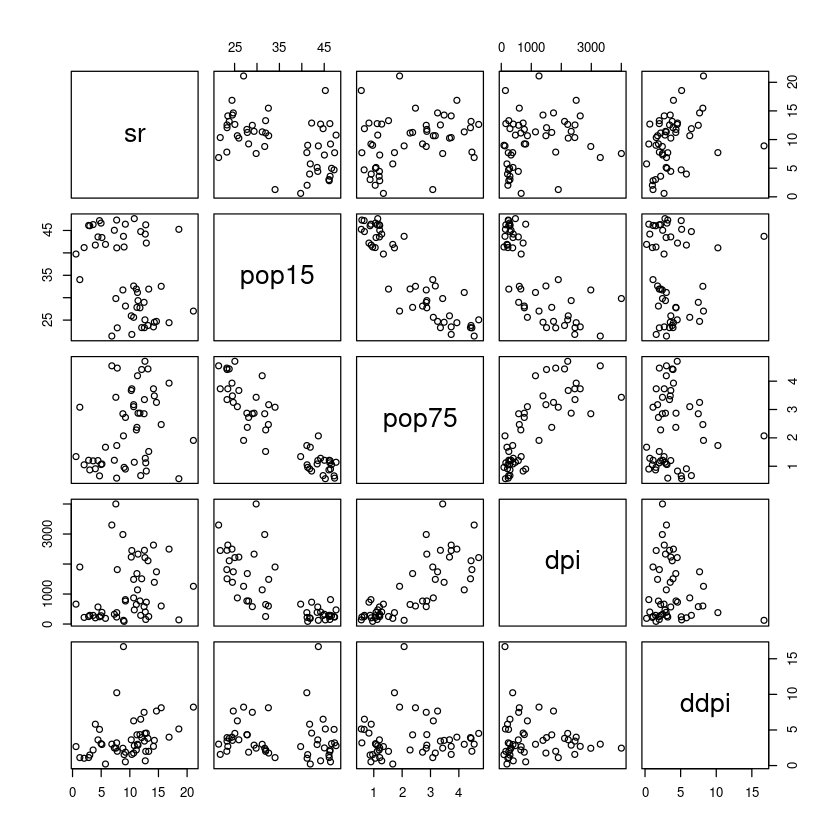

In [42]:
pairs(savings)

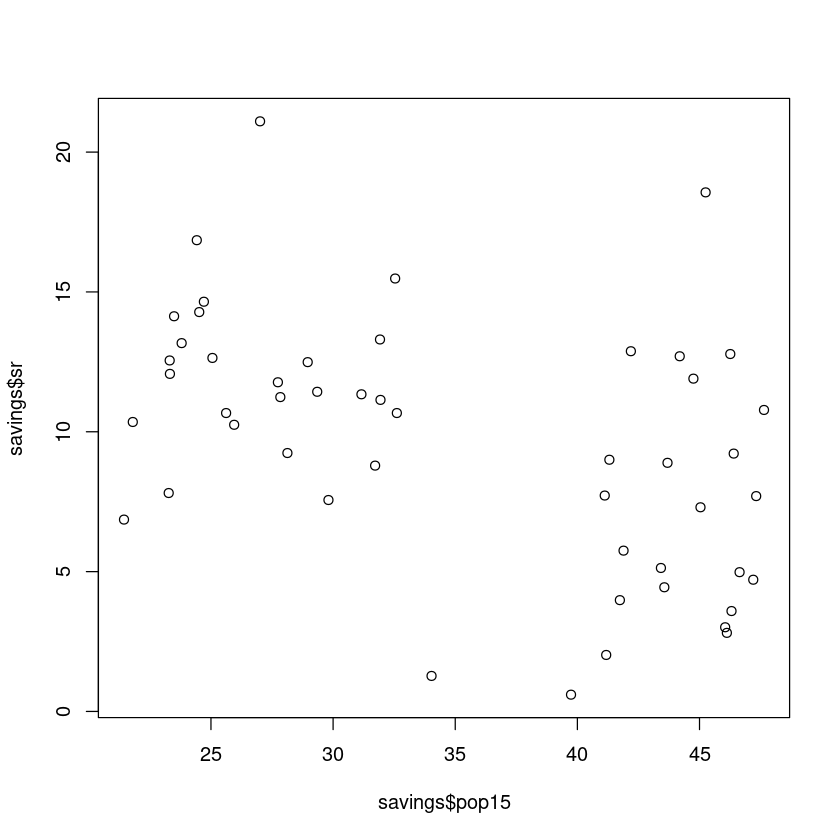

In [43]:
plot(savings$pop15, savings$sr)

In [44]:
prim_data_bigger = savings$sr[savings$pop15 > 35]
mean(prim_data_bigger)
sd(prim_data_bigger)

[1] 7.41087

[1] 4.385117

In [45]:
prim_data_smaller = savings$sr[savings$pop15 < 35]
mean(prim_data_smaller)
sd(prim_data_smaller)

[1] 11.5963

[1] 3.632194

дали мютата са различими? Дали са независими? Ще ползваме т тест

In [46]:
?t.test

In [47]:
t.test(prim_data_smaller, prim_data_bigger)


	Welch Two Sample t-test

data:  prim_data_smaller and prim_data_bigger
t = 3.6365, df = 42.846, p-value = 0.0007366
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.864081 6.506772
sample estimates:
mean of x mean of y 
 11.59630   7.41087 


този тест е two-sided, a ние искаме one sided, 

In [48]:
t.test(prim_data_smaller, prim_data_bigger , alternative='greater')


	Welch Two Sample t-test

data:  prim_data_smaller and prim_data_bigger
t = 3.6365, df = 42.846, p-value = 0.0003683
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 2.250452      Inf
sample estimates:
mean of x mean of y 
 11.59630   7.41087 


Забелязваме, че p-valueto e по- малко, ще тествам, че H0 e 

In [49]:
g2 = lm(sr ~ pop75 + ddpi + dpi, data=savings)
summary(m2)


Call:
lm(formula = sr ~ pop75 + ddpi + dpi, data = savings)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0577 -3.2144  0.1687  2.4260 10.0763 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.4874944  1.4276619   3.844  0.00037 ***
pop75       0.9528574  0.7637455   1.248  0.21849    
ddpi        0.4737951  0.2137272   2.217  0.03162 *  
dpi         0.0001972  0.0010030   0.197  0.84499    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.164 on 46 degrees of freedom
Multiple R-squared:  0.189,	Adjusted R-squared:  0.1361 
F-statistic: 3.573 on 3 and 46 DF,  p-value: 0.02093


In [50]:
anova(g,g2)

Res.Df RSS      Df Sum of Sq F        Pr(>F)     
1 45     650.7130 NA        NA       NA          NA
2 46     797.7249 -1 -147.0119 10.16659 0.002603019

In [51]:
g2 = lm(sr ~ I(pop15 + pop75)+dpi+ddpi, data=savings)

In [52]:
anova(g2,g)

Res.Df RSS      Df Sum of Sq F        Pr(>F)   
1 46     673.6275 NA       NA        NA        NA
2 45     650.7130  1 22.91453  1.584652 0.2145833

Нямаме основвание да приемем такаа хитотез

сега да видим дали има някаква стойност, която ае пколкото да даден модел

In [ ]:
gr_kifle = pop15+pop75+dpi+offset(ddpi),savings)

In [56]:
gr <- lm(sr ~ pop15+pop75+dpi+offset(ddpi),savings)
gr


Call:
lm(formula = sr ~ pop15 + pop75 + dpi + offset(ddpi), data = savings)

Coefficients:
(Intercept)        pop15        pop75          dpi  
 24.4001921   -0.4166010   -1.8699070    0.0003788  


### HW2:
 доверителен итервал от 3.3 и 3.4